<a href="https://colab.research.google.com/github/gogogo221/Rhino-Sentiment-Analysis-Project/blob/main/rhino_sentiment_us_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import openpyxl
import math
import io
from google.colab import files
import plotly.express as px
from geopandas import GeoDataFrame

In [4]:
uploaded = files.upload()

Saving us_tweets_predicted_sentiment.csv to us_tweets_predicted_sentiment.csv


In [5]:
fn = 'us_tweets_predicted_sentiment.csv'
df = pd.read_csv(io.BytesIO(uploaded[fn]), skipinitialspace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,tweet,tweet_id,author_id,lang,username,description,location,users_created_at,public_metrics,verified,country,region,prediction
0,0,0,east tx american association of zoo keepers to...,8.990000e+17,9.366272e+06,en,RhinosIRF,IRF is dedicated to the survival of the world’...,"Fort Worth, TX",2007-10-11 02:41:30+00:00,"{'followers_count': 45138, 'following_count': ...",False,United States,Texas,0
1,1,1,new on our blog: rhino protection unit trainin...,6.810000e+17,9.366272e+06,en,RhinosIRF,IRF is dedicated to the survival of the world’...,"Fort Worth, TX",2007-10-11 02:41:30+00:00,"{'followers_count': 45138, 'following_count': ...",False,United States,Texas,0
2,2,2,rt @cursedani: horn of the rhino (s1/ep8) - 60...,1.490000e+18,2.163844e+09,en,curemachwindy,late 20s nys transplanted southern lady ❣ take...,Southwest Florida,2013-10-30 01:08:50+00:00,"{'followers_count': 468, 'following_count': 72...",False,United States,Florida,0
3,3,3,tell china that rhino horn isn't medicine! htt...,1.070000e+18,1.150690e+09,en,SirlanceSmith,"Animal lover, rescuer, Co-Founder with Arthur ...","New York, NY.",2013-02-05 11:30:04+00:00,"{'followers_count': 632, 'following_count': 14...",False,United States,New York,0
4,4,4,new report confirms number of rhinos poached i...,7.790000e+17,9.366272e+06,en,RhinosIRF,IRF is dedicated to the survival of the world’...,"Fort Worth, TX",2007-10-11 02:41:30+00:00,"{'followers_count': 45138, 'following_count': ...",False,United States,Texas,-1


In [13]:
uploaded2 = files.upload()

In [84]:
states = gpd.read_file('tl_2022_us_state.shp')

(15.0, 80.0)

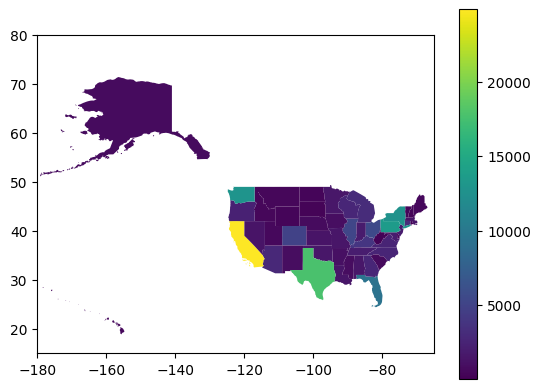

In [81]:
tweets_by_state = df.copy()
tweets_by_state['tweets'] = 1

tweets_by_state = tweets_by_state[['region','tweets']].groupby('region').count().reset_index(names=['NAME'])

merged = pd.merge(tweets_by_state, states, on="NAME")

gdf = GeoDataFrame(merged, geometry=merged['geometry'])
fig, ax = plt.subplots(1, 1)
gdf.plot(ax=ax, column="tweets", legend=True)
ax.set_xlim(-180, -65)
ax.set_ylim(15, 80)

(15.0, 80.0)

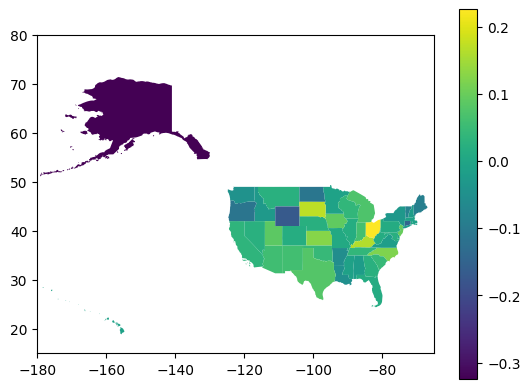

In [83]:
prediction = df.copy()
prediction = prediction[['region','prediction']].groupby('region').mean().reset_index(names=['NAME'])
prediction.head()

merged = pd.merge(prediction, states, on="NAME")

gdf = GeoDataFrame(merged, crs="EPSG:4326", geometry=merged['geometry'])
gdf['prediction'].min()
fig, ax = plt.subplots(1, 1)
gdf.plot(ax=ax, column="prediction", legend=True)
ax.set_xlim(-180, -65)
ax.set_ylim(15, 80)
